In [1]:
import sys
import os

# Get the absolute path to the project directory
project_dir = os.path.abspath("..")

# Append the project directory to sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

In [2]:
import sys
import os

# Get the absolute path to the project directory
project_dir = os.path.abspath("..")

# Append the project directory to sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)

import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
from dataclasses import asdict, is_dataclass, dataclass
import os
import json
import pickle
from pandas.api.types import is_datetime64_any_dtype
import numpy as np
from typing import Dict
import polars as pl

from src.common.AssetData import AssetData
from src.common.AssetDataPolars import AssetDataPolars
from src.common.AssetDataService import AssetDataService
from src.common.AssetFileInOut import AssetFileInOut 
from src.featureAlchemy.FeatureGroupDynamic import FeatureGroupDynamic

In [3]:
assets=AssetFileInOut("../src/stockGroups/bin").loadDictFromFile("group_debug")

# Convert to Polars for speedup
assetspl: Dict[str, AssetDataPolars] = {}
for ticker, asset in assets.items():
    assetspl[ticker] = AssetDataService.to_polars(asset)

In [4]:
asset = assetspl["NVDA"]
params = {
    'timesteps': 60,
}

testdate = pd.Timestamp(2019, 7, 1, tz = "UTC")

fgd = FeatureGroupDynamic(
    assetspl, 
    startDate=pd.Timestamp(2019, 1, 1, tz = "UTC"),
    endDate=pd.Timestamp(2020, 1, 1, tz = "UTC"),
    lagList = [1,2,3,5,9],
    monthHorizonList= [1,2,5,7],
    params=params
)

2018-06-14 00:00:00+00:00
2019-12-31 00:00:00+00:00


Text(0.5, 1.0, 'Weighted Index')

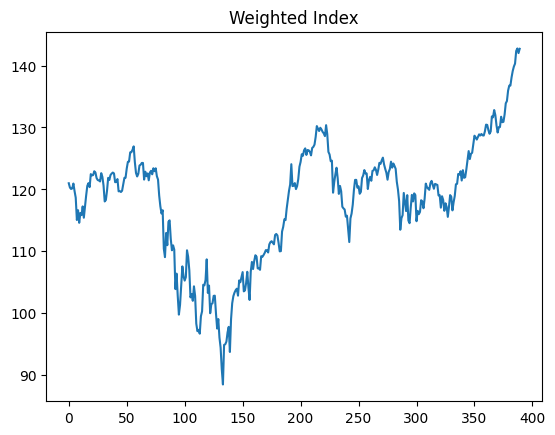

In [5]:
featureNames = fgd.getFeatureNames()
featuresDict = fgd.apply(testdate)
feature = featuresDict["NVDA"]

wghtIdx: np.array = fgd.weightedIndex

print(fgd.business_days[0])
print(fgd.business_days[-1])

# plot wghtidx
plt.plot(wghtIdx)
plt.title("Weighted Index")

In [6]:
featureNamesTimeseries = fgd.getTimeFeatureNames()
featuresTimeseriesDict = fgd.apply_timeseries(testdate)
featuresTimeseries = featuresTimeseriesDict["NVDA"]